Необязательное дз по курсу "Прикладные задачи анализа данных"

Николаев Сергей, 517 группа

In [125]:
import numpy as np
import scipy
import networkx as nx

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

In [144]:
def plot_graph(G):
    node_color = [0] * G.number_of_nodes()
    for node, color in nx.coloring.greedy_color(G).items():
        node_color[node] = color
    nx.draw(G, pos=nx.layout.circular_layout(G), node_color=node_color)
    plt.show()

# 1

Необходимо показать, что оценка $[\lambda_1(A)] + 1$ является точной оценкой числа необходимых и достаточных цветов для раскраски графа.

Это довольно очевидно, достаточно рассмотреть полносвязный граф. Для него максимальное собственное значение матрицы связности совпадает с максимальной степенью вершин $d_{max}$ (неравенство, выведенное на презентации, обращается в равенство). При этом для полносвязного графа необходимо ровно $d_{max} + 1$ цветов для окраски.

Простой пример

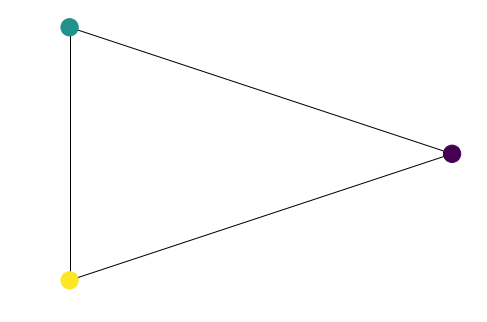

In [145]:
G = nx.complete_graph(n=3)

plot_graph(G)

In [143]:
nx.adjacency_spectrum(G)

array([-1.+0.j,  2.+0.j, -1.+0.j])

Как видно, $\lambda_{max} + 1 = 3$

# 2

Необходимо было показать на примерах выполнение двух теорем о связи двудольности со спектром беззнакового Лапласа:
* Граф двудольный тогда и только тогда, когда спектр Лапласа равен спектру беззнакового Лапласа
* Кратность нуля как с.зн. беззнакового Лапласа равна числу компонент двудольности

## 2.1

Сгенерируем двудольные графы    

--------------------


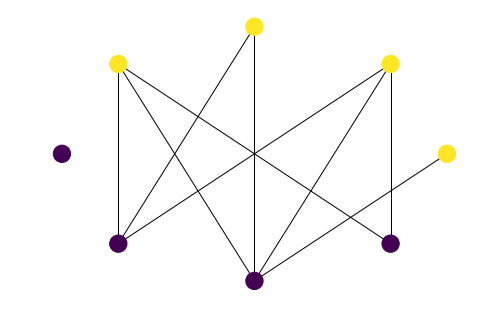

Спектр Лапласа: [5.92390933e+00+0.j 3.73711842e+00+0.j 2.61929351e-16+0.j
 8.48668016e-01+0.j 1.49030423e+00+0.j 3.00000000e+00+0.j
 3.00000000e+00+0.j 0.00000000e+00+0.j]
Спектр беззнакового Лапласа: [5.92390933e+00+0.j 3.73711842e+00+0.j 2.61929351e-16+0.j
 8.48668016e-01+0.j 1.49030423e+00+0.j 3.00000000e+00+0.j
 3.00000000e+00+0.j 0.00000000e+00+0.j]
--------------------


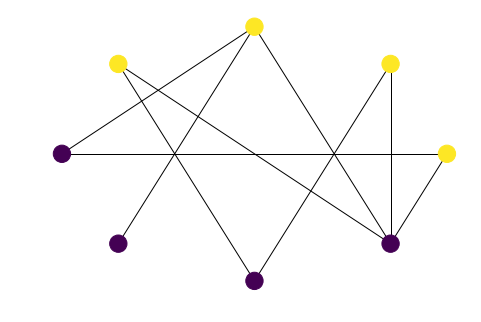

Спектр Лапласа: [ 5.55484264e+00+0.j -7.94657150e-16+0.j  4.66794300e-01+0.j
  9.44233051e-01+0.j  3.73580782e+00+0.j  2.79386973e+00+0.j
  2.50445245e+00+0.j  2.00000000e+00+0.j]
Спектр беззнакового Лапласа: [ 5.55484264e+00+0.j -7.94657150e-16+0.j  4.66794300e-01+0.j
  9.44233051e-01+0.j  3.73580782e+00+0.j  2.79386973e+00+0.j
  2.50445245e+00+0.j  2.00000000e+00+0.j]
--------------------


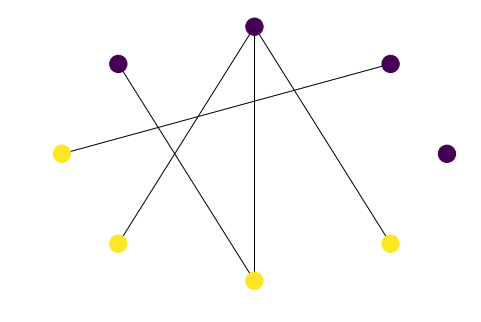

Спектр Лапласа: [ 4.17008649e+00+0.00000000e+00j  2.31110782e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  5.18805696e-01+0.00000000e+00j
 -6.22625730e-17+3.70073308e-17j -6.22625730e-17-3.70073308e-17j
  2.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
Спектр беззнакового Лапласа: [ 4.17008649e+00+0.00000000e+00j  2.31110782e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  5.18805696e-01+0.00000000e+00j
 -6.22625730e-17+3.70073308e-17j -6.22625730e-17-3.70073308e-17j
  2.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]


In [149]:
for i in range(3):
    print('-' * 20)
    G = nx.bipartite.random_graph(4, 4, p=0.5, seed=i)
    plot_graph(G)
    print('Спектр Лапласа: {}'.format(scipy.linalg.eigvals(nx.laplacian_matrix(G).toarray())))
    print('Спектр беззнакового Лапласа: {}'.format(scipy.linalg.eigvals(np.abs(nx.laplacian_matrix(G).toarray()))))

Сгенерируем недвудольные графы

--------------------


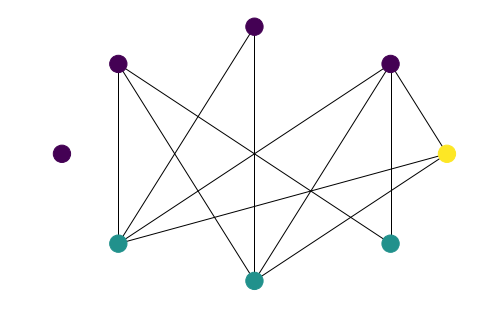

Спектр Лапласа: [1.77635684e-15+0.j 6.35744372e+00+0.j 4.70558027e+00+0.j
 1.48924309e+00+0.j 2.28587005e+00+0.j 3.16186288e+00+0.j
 4.00000000e+00+0.j 0.00000000e+00+0.j]
Спектр беззнакового Лапласа: [6.89059547+0.j 0.35711189+0.j 1.34134596+0.j 2.3218437 +0.j
 3.73730458+0.j 3.3517984 +0.j 4.        +0.j 0.        +0.j]
--------------------


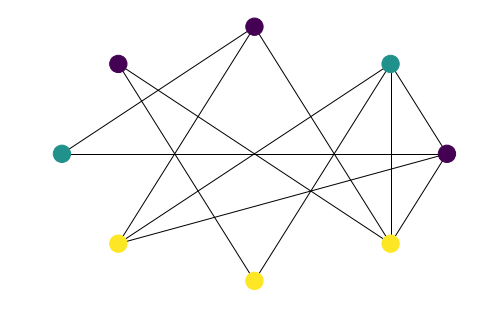

Спектр Лапласа: [6.09270042e+00+0.j 5.33473845e+00+0.j 6.80554993e-16+0.j
 9.18761632e-01+0.j 3.78589663e+00+0.j 3.20943671e+00+0.j
 2.11558199e+00+0.j 2.54288416e+00+0.j]
Спектр беззнакового Лапласа: [6.87567895+0.j 0.32959043+0.j 0.81151504+0.j 3.31948828+0.j
 2.15343462+0.j 2.51029269+0.j 4.        +0.j 4.        +0.j]
--------------------


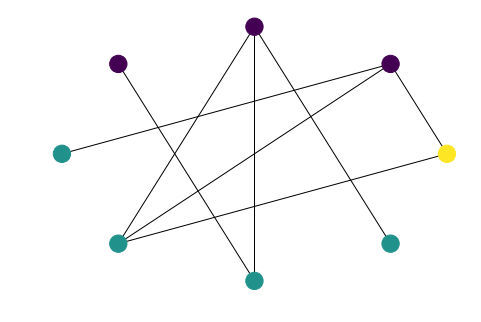

Спектр Лапласа: [ 4.71031959e+00+0.j  3.89427452e+00+0.j  3.19426153e+00+0.j
  2.16030616e+00+0.j  1.13845690e+00+0.j -9.83808082e-17+0.j
  2.58764372e-01+0.j  6.43616921e-01+0.j]
Спектр беззнакового Лапласа: [5.1102513 +0.j 3.93444867+0.j 2.47180284+0.j 2.        +0.j
 1.30267224+0.j 0.11050572+0.j 0.4524615 +0.j 0.61785774+0.j]


In [166]:
for i in range(3):
    print('-' * 20)
    G = nx.bipartite.random_graph(4, 4, p=0.5, seed=i)
    G.add_edge(0, 1)
    G.add_edge(0, 5)
    G.add_edge(1, 5)
    plot_graph(G)
    print('Спектр Лапласа: {}'.format(scipy.linalg.eigvals(nx.laplacian_matrix(G).toarray())))
    print('Спектр беззнакового Лапласа: {}'.format(scipy.linalg.eigvals(np.abs(nx.laplacian_matrix(G).toarray()))))

Как видно из примеров, теорема действительно выполняется.

## 2.2

Здесь возник вопрос, что понимать под числом компонент двудольности. 

Обобщим двудольность на случай, когда долей несколько. Числом компонент двудольности в этом случае логично считать число долей. Заметим, что утверждение теоремы не работает уже для двудольного случая (компонент двудольности 2, а кратность с.зн. равна 1). Проверим, вдруг кратность с.зн. равна "числу компонент двудольности минус 1".

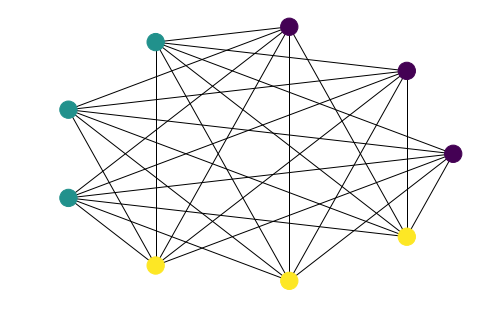

Спектр Лапласа: [0.+0.j 6.+0.j 9.+0.j 6.+0.j 9.+0.j 6.+0.j 6.+0.j 6.+0.j 6.+0.j]
Спектр беззнакового Лапласа: [12.+0.j  6.+0.j  3.+0.j  6.+0.j  3.+0.j  6.+0.j  6.+0.j  6.+0.j  6.+0.j]


In [168]:
G = nx.complete_multipartite_graph(3, 3, 3)
plot_graph(G)
print('Спектр Лапласа: {}'.format(scipy.linalg.eigvals(nx.laplacian_matrix(G).toarray())))
print('Спектр беззнакового Лапласа: {}'.format(scipy.linalg.eigvals(np.abs(nx.laplacian_matrix(G).toarray()))))

Как видно, в этом случае вообще нет нулевых собственных значений.

Будем понимать под числом компонент двудольности число компонент связности в двудольном графе.

In [170]:
?nx.union_all

--------------------


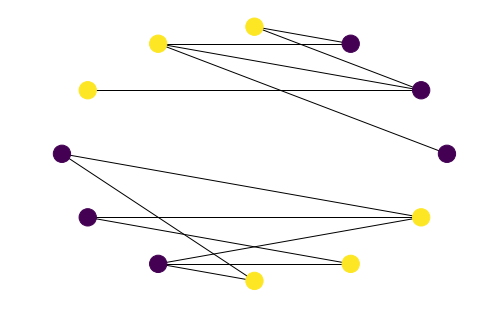

Спектр Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j]
Спектр беззнакового Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j]
--------------------


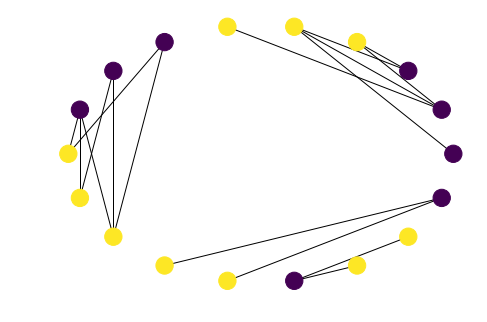

Спектр Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j]
Спектр беззнакового Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j]
--------------------


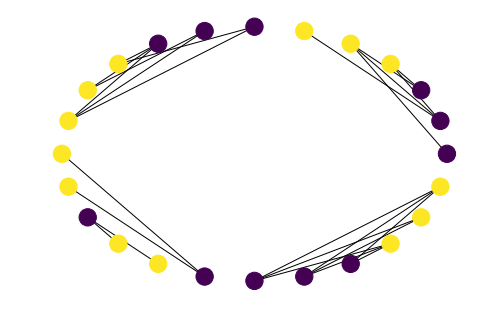

Спектр Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  5.56155281e+00+0.j  1.04278565e-15+0.j  1.43844719e+00+0.j
  3.00000000e+00+0.j  3.00000000e+00+0.j  3.00000000e+00+0.j]
Спектр беззнакового Лапласа: [ 4.81360650e+00+0.j  2.48292462e-16+0.j  6.57076917e-01+0.j
  1.00000000e+00+0.j  3.00000000e+00+0.j  2.52931658e+00+0.j
  5.00000000e+00+0.j -4.76168042e-16+0.j  1.00000000e+00+0.j
  3.00000000e+00+0.j  2.00000000e+00+0.j  3.00000000e+00+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  3.00000000e+00+0.j  1.00000000e+00+0.j -3.36770206e-17+0.j
  5.56155281e+00+0.j  1.04278565e-15+0.j  1.43844719e+00+0.j
  3.00000000e+00+0.j  3.00000000e+00+0.

In [172]:
for i in range(2, 5):
    print('-' * 20)
    G = nx.disjoint_union_all([nx.bipartite.random_graph(3, 3, p=0.7, seed=j) for j in range(i)])
    plot_graph(G)
    print('Спектр Лапласа: {}'.format(scipy.linalg.eigvals(nx.laplacian_matrix(G).toarray())))
    print('Спектр беззнакового Лапласа: {}'.format(scipy.linalg.eigvals(np.abs(nx.laplacian_matrix(G).toarray()))))

Подсчитав количество компонент связности и количество нулевых собственных значений в беззнаковом Лапласе, можно убедиться, что условие теоремы выполняется. Это довольно логично, так как матрицу беззнакового Лапласа графа можно представить как блочно-диагональную матрицу, на диагонали которой расположены матрицы беззнакового Лапласа компонент связности. Из предыдущей теоремы известно, что у каждой компоненты связности, двудольного графа, спектр беззнакового Лапласа совпадает со спектром Лапласа. В свою очередь, в спектре Лапласа связного графа есть только одно нулевое с.зн. Таким образом, кратность нулевого с.зн. беззнакового Лапласа для двудольного графа равна числу компонент связности.